---

# **title: 'REVIEW-그래프와 머신러닝'**

# **date: '2022-07-06 09:00'**

---

## 데이터 분석(머신러닝, 딥러닝) 프로세스
- 데이터 불러오기
  + CSV, 오라클, MySQL, PostgreSQL, 클라우드 DB연동
- 탐색적 자료 분석
  + 데이터 전처리 및 가공
- 잠정적인 컬럼의 갯수를 지정
- 머신러닝 모델(=통계 모델링, t.test, 분산분석, 교차분석)
- 머신러닝 모델의 경우 배포(지금은 다루지 않음)
 + JSP-스프링 웹개발 시 배우게 됨.
- 통계 모델링 경우 p-value값 기준으로 귀무가설 및 대립가설 검정

- (공통) 결과보고서를 작성 필요.
 + .PPT준비

## 그래프 복습
- 수치형 데이터 시각화
- 범주형 데이터 시각화
- 데이터 관계 시각화
 + matplotlib 라이브러리 방법(복잡)
 + seaborn 라이브러리 방법(단순)

### 수치형 데이터 시각화

In [76]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

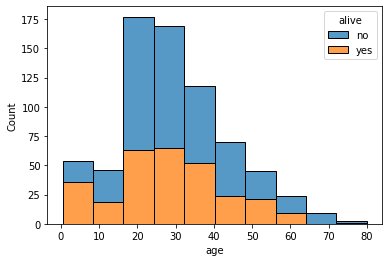

In [77]:
# 히스토그램
sns.histplot(data= titanic, x = 'age',bins=10, hue= 'alive',multiple='stack')

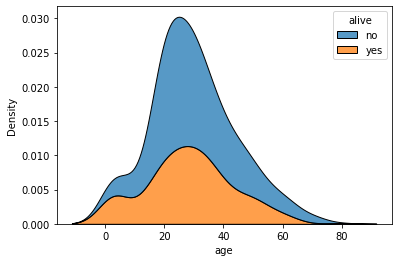

In [78]:
# 확률밀도추정(KDE) 함수 그래프- 히스토그램을 부드러운 곡선 형태로 표현한다.
# 연속형 데이터 1개만 쓸 때 사용, y축은 수량의 비율
sns.kdeplot(data =titanic, x ='age',hue= 'alive',multiple='stack')

- 분포도
 - 수치형 데이터 한개 컬럼의 분포를 나타내는 그래프
  + 정규분포인가?
- ditstplot()히스토그램에 kdeplot와,rugplot을 한번에 그림

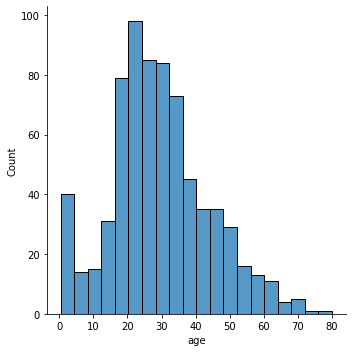

In [79]:
sns.displot(data =titanic, x ='age')

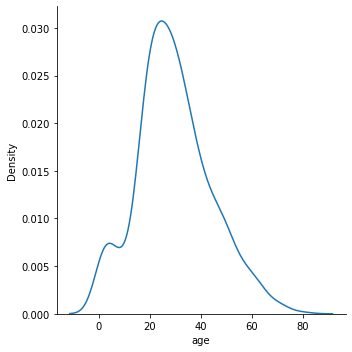

In [80]:
sns.displot(data =titanic, x ='age',kind='kde')

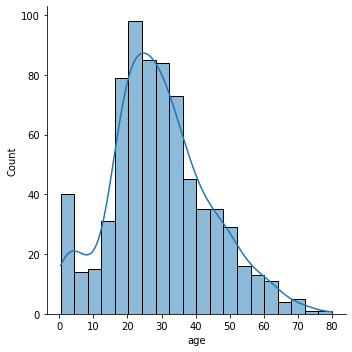

In [81]:
sns.displot(data =titanic, x ='age',kde =True)

## 범주형 데이터 시각화
- x축 범주형, y축 수치 데이터

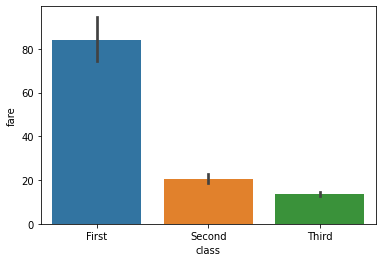

In [82]:
# 막대 그래프-matplotlib은 개수를 세는 작업을 해줘야하지만 seaborn은 알아서 해준다.
sns.barplot(x='class',y='fare',data= titanic)
# 클래스 별로 가격을 표시했지만 그 가격은 평균치를 나타내고 에러바(오차막대)를 만들어줌

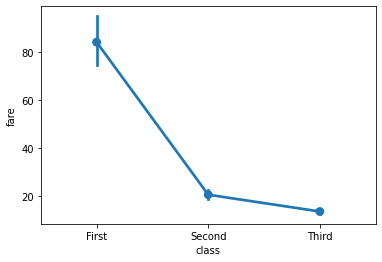

In [83]:
# 포인트 플롯
sns.pointplot(x='class',y='fare',data=titanic)

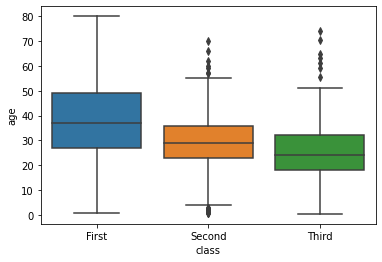

In [84]:
# boxplot(박스플롯)
sns.boxplot(x='class',y='age',data=titanic)

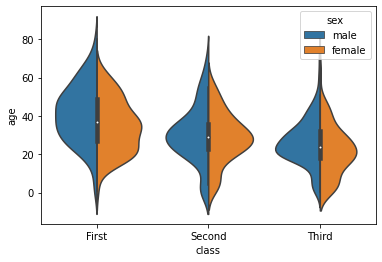

In [85]:
#바이올린 플롯
sns.violinplot(x= 'class', y='age', hue='sex',data=titanic,split =True)

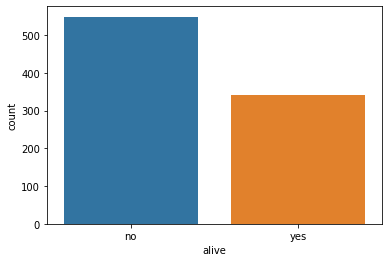

In [86]:
# 카운트 플롯
# - 범주형데이터의 갯수 확인할 때 사용
sns.countplot(x = 'alive', data= titanic)

## 데이터 관계 시각화
- 여러 데이터 사이의 관계도 파악을 위한 그래

In [87]:
# 히트맵
flights =sns.load_dataset('flights')
print(flights.head(7))


   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
5  1949   Jun         135
6  1949   Jul         148


In [88]:
#  각 연도별 월별 승객수 구하기
# flights['year'].value_count()
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')
print(flights_pivot)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

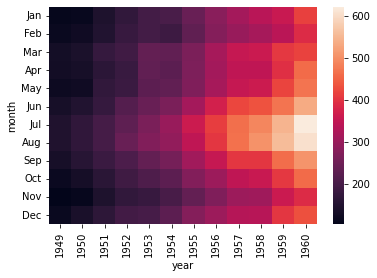

In [89]:
sns.heatmap(data = flights_pivot)# 시각화를 통해 1960년대 8월에 가장 사람들 수가 많았다.

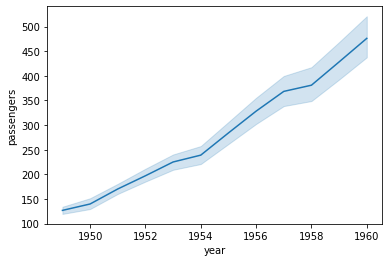

In [90]:
# 라인플롯
sns.lineplot(x='year',y='passengers',data=flights)

In [91]:
# 산점도
tips =sns.load_dataset('tips')
tips.head(8)
# 영수증금액/ 팁/ 성별/ 담배/ 요일/ 시간/ 같이먹은 사람의 수(카운트데이터)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4


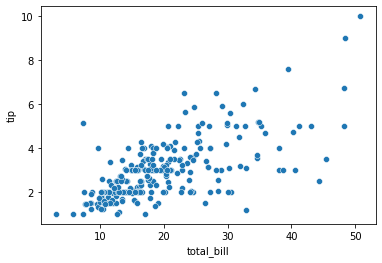

In [92]:
# 두개의 연속형 데이터
sns.scatterplot(x='total_bill',y='tip',data= tips)

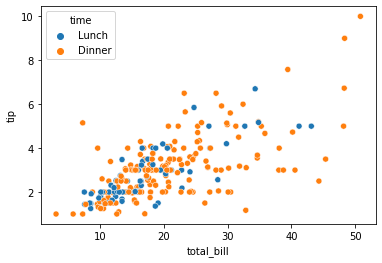

In [93]:
sns.scatterplot(x='total_bill',y='tip',hue ='time',data= tips)
# 저녁에 더 많은 팁을 준다.

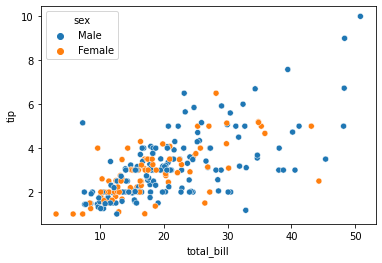

In [94]:
sns.scatterplot(x='total_bill',y='tip',hue ='sex',data= tips)
# 남자들의 경우 영수증 금액이 클수록 팁의 양(+)에 상관관계가 있다.

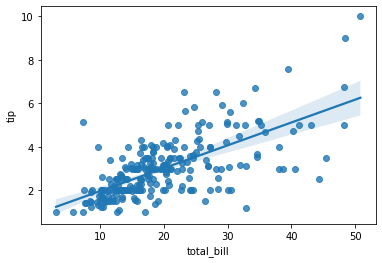

In [95]:
# 회귀선
#선형회귀 적합선(상관관계를 표현한 선)을 포함한 산점도를 그리자.
sns.regplot(x= 'total_bill',y= 'tip', data =tips)
# 30달라를 냈을 때 4달러의 팁이 예상됨.

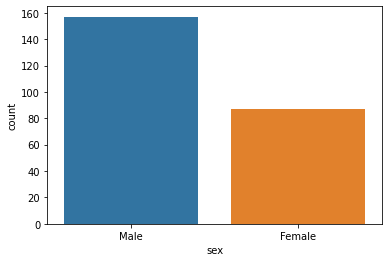

In [96]:
sns.countplot(x='sex',data =tips)
# 남자와 여자를 비교할 때 남자들이 자주 팁을 준다.

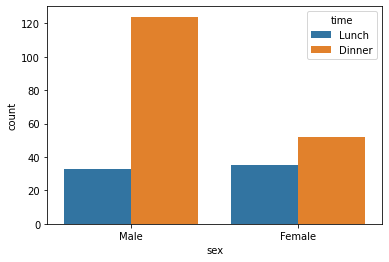

In [97]:
sns.countplot(x='sex',hue='time',data=tips)
# 남자가 여자보다 저녁시간에 팁주는 횟수가 많다.

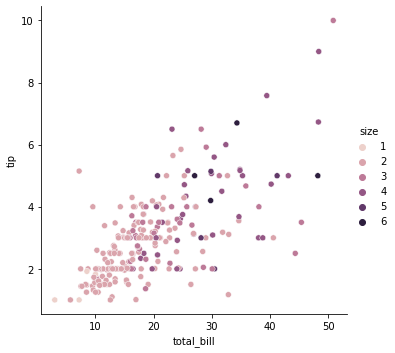

In [98]:
sns.relplot(x="total_bill",y="tip",hue='size',data=tips)

## 머신러닝 리뷰
- 가장 인기 있는 모델
 + lightGBM, XGBoost

###  선형회귀
- 선형회귀식을 찾는 것이 중요
- $y =3 x +4$ 에 근사한 데이터 50개 생성

In [99]:
import numpy as np 
import pandas as pd

# 시드값 고정- 랜덤한 내용이 다른 사람들과 같은 결과를 얻기 위해
np.random.seed(0)
intercept = 4 # 절편, 상수
slope = 3 # 기울기

# 변동성 주기 위해 노이즈 생성
noise = np.random.randn(50, 1)
x = 5 * np.random.rand(50, 1) # 0과 5사이의 실숫값 50개 생성
y = slope * x + intercept + noise

# 데이터 프레임 생성
data = pd.DataFrame({'X' : x[:, 0], 'Y' : y[:, 0]})
print(data)

           X          Y
0   0.794848   8.148596
1   0.551876   6.055784
2   3.281648  14.823682
3   0.690915   8.313637
4   0.982912   8.816293
5   1.843626   8.553600
6   4.104966  17.264987
7   0.485506   5.305162
8   4.189725  16.465955
9   0.480492   5.852075
10  4.882297  18.790936
11  2.343256  12.484042
12  4.883805  19.412454
13  3.024228  13.194358
14  3.696318  15.532817
15  0.195939   4.921491
16  1.414035   9.736184
17  0.600983   5.597790
18  1.480701   8.755171
19  0.593639   4.926820
20  1.589916   6.216758
21  2.071315  10.867564
22  0.320737   5.826649
23  3.462361  13.644917
24  2.833007  14.768776
25  1.326947   6.526477
26  2.616240  11.894479
27  0.469703   5.221924
28  2.879732  14.171977
29  4.646481  19.408802
30  1.592845   8.933482
31  3.337052  14.389318
32  0.658989   5.089182
33  3.581636  12.764112
34  1.447030   7.993179
35  0.915957   6.904219
36  2.932565  14.027985
37  0.100538   5.503993
38  4.144700  16.046774
39  0.023477   3.768129
40  3.389083  13

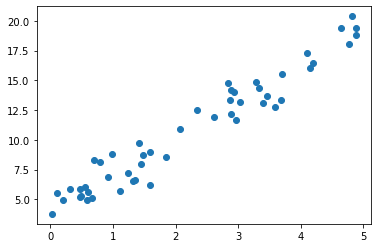

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data['X'], data['Y'])
plt.show()

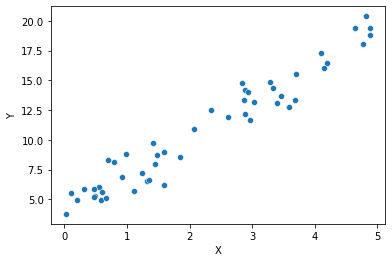

In [102]:
import seaborn as sns 
sns.scatterplot(x = 'X', y = 'Y', data = data)

#### 선형회귀 모형 훈련
- 모형 생성 후, 회귀계수 3과 y절편 4에 근사한 값이 나와야 함


In [103]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()#,선형회귀 모델
lr_model.fit(x,y)##모델훈련

print('y절편:', lr_model.intercept_)
print('회귀계수:', lr_model.coef_)

y절편: [4.05757639]
회귀계수: [[3.03754061]]


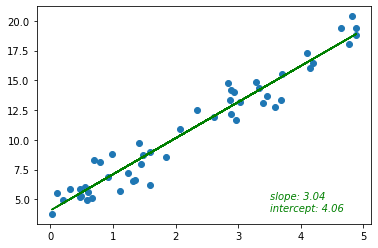

In [104]:
# 예측값
y_pred = lr_model.predict(x)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_pred, color='green')

# slope, intercept 
label = 'slope: {}\nintercept: {}'.format(round(lr_model.coef_[0][0], 2), round(lr_model.intercept_[0], 2))
ax.text(3.5, 4, label, style ='italic', 
        fontsize = 10, color ="green")
plt.show()

### 로지스틱 회귀
- 

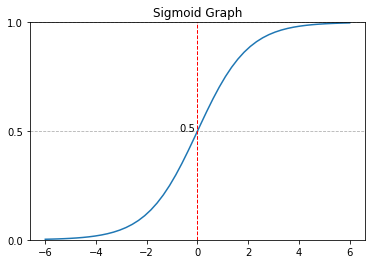

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

x = np.linspace(-6, 6)
y = sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid(which='major', axis='y', linestyle='--')
ax.axvline(x=0, color='r', linestyle='--', linewidth=1)
ax.set_ylim(0,1)
ax.set_yticks([0, 1, 0.5])
ax.text(0-0.1, 0.5, '0.5', ha='right')
ax.set_title('Sigmoid Graph')
plt.show()


In [106]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 가져오기
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# 모델 생성 및 학습
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [107]:
# 모형 평가
p_pred =model.predict_proba(x)
print('p_pred',p_pred,sep ='\n')

p_pred
[[0.97979027 0.02020973]
 [0.94958202 0.05041798]
 [0.87976149 0.12023851]
 [0.73975066 0.26024934]
 [0.52477284 0.47522716]
 [0.30020373 0.69979627]
 [0.1428487  0.8571513 ]
 [0.06080627 0.93919373]
 [0.02453462 0.97546538]
 [0.00967652 0.99032348]]


In [108]:
y_pred = model.predict(x)
print('y_pred',y_pred)

y_pred [0 0 0 0 0 1 1 1 1 1]


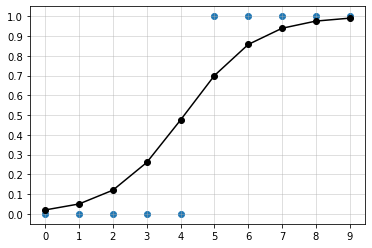

In [109]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, p_pred[:, 1], color = 'black',  marker='o', markersize=6)
ax.plot()

ax.set_xticks(x)
ax.set_yticks(np.arange(0, 1.1, 0.1))

ax.grid(which='major', alpha=0.5)
plt.show()

In [110]:
conf_m = confusion_matrix(y,y_pred)
print(conf_m)

[[5 0]
 [0 5]]


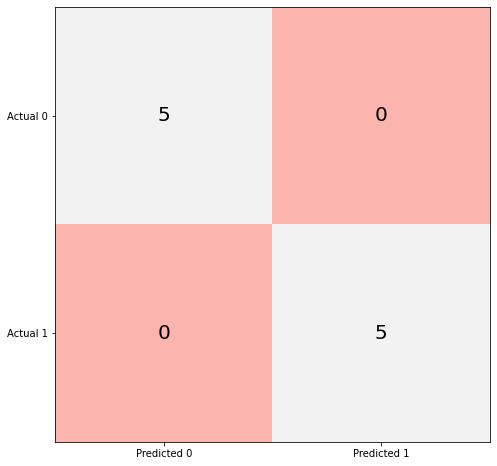

In [111]:
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap = 'Pastel1')# pastel2는 색깔임 'GnBu'
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=20)
plt.show()

### 결정 트리
- 분류와 회귀 문제에 모두 사용가능

### 주요 개념
- 작동 원리
  + 데이터를 가장 잘 구분하는 조건을 정함.
  + 조건을 기준으로 데이터를 두 범주로 나눔
  + 나뉜 각 범주의 데이터를 구분하는 조건을 정함
  + 각 조건을 기준으로 데이터를 두 범주로 나눔
  + 언제까지 계속 분할할지 정한 후, 최종 결정 값을 구함.
- 불순도(Impurity)
  + 한 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지 나타냄
  + 흰색과 검은색이 50:50으로 섞여 있다. (불순도 최대)
  + 흰색과 검은색으로 완전 분리 되었다. (불순도 최소)
- 엔트로피(Entropy)
  + 불확실한 정도를 의미함. 0 ~ 1로 정함.
  + 흰색과 검은색이 50:50으로 섞여 있다. 엔트로피 1
  + 흰색과 검은색으로 완전 분리 되었다. 엔트로피 0
- 정보이득(Information Gain)
  + 1에서 엔트로피를 뺀 수치
  + 정보 이득을 최대화하는 방향(엔트로피를 최소화 하는 방향)으로 노드를 분할함
- 지니 불순도(Gini Impurity)
  + 지니 불순도 값이 클수록 불순도도 높고, 작을수록 불순도도 낮음. 엔트로피와 마찬가지로 지니 불순도가 낮아지는 방향으로 노드 분할함.

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
import seaborn as sns 

# tips 데이터셋 
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- suvived의 비율을 구한다
 + 0: 사망자
 + 1: 생존

In [113]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [114]:
X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 3), (268, 3), (623,), (268,))

In [115]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

acc = tree_model.score(X_test, y_test)
print(f'모형 정확도 : {acc:.3f}') # 정확도 측정

모형 정확도 : 0.675


## 랜덤 포레스

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
import seaborn as sns 

# tips 데이터셋 
titanic = sns.load_dataset('titanic')

X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)

# 모델 훈련
rf_model = RandomForestClassifier(random_state=42) # 랜덤 포레스트 정의
rf_model.fit(X_train, y_train)

acc = rf_model.score(X_test, y_test)
print(f'모형 정확도 : {acc:.3f}') # 정확도 측정

모형 정확도 : 0.675


## XGBoost(2016) & LightGBM
- 전통적인 머신러닝 알고리즘의 융합
  - 선형회귀 릿지 라쏘, 과적합 방지를 위한 규제
  + 결정트리의 핵심적인 알고리즘
  + 경사 하강법
  + 부스팅 기법
- 문제점 : 파라미터의 개수가 매우 많음
- 왜 많이 사용할까?
 + 모델 학습 속도
 + 성능
 + 가장 좋은 모델이란 학습속도는 빠르고 성능이 좋음.(기준: 지금까지 나온 알고리즘과 비교해서)
- 언어를 Python,Java에서 시작했어도 C,C++로 가야만 됨.
- 개발 초기: 자체 사용 용도로 개발 --> Python Wrapper 
  - R, 머신러닝 프레임워크 종류가 다양.
  - 파이썬 머신러닝 중 Scikit-Learn이 대세로 떠오름
- 개발 중기: 파이썬 머신러닝 Scikit-Learn에서 API를 사용해 XGBoost을 사용


### XGBoost-Python Wrapper 방식
- X_train, Y_train
- 각 모듈에 맞도록 행렬을 재변환해야 함.



In [117]:
import xgboost as xgb # 엑스지부스터를 사용->파이썬래퍼 방식
from sklearn.model_selection import train_test_split
import seaborn as sns

In [119]:
# 데이터 분리
titanic = sns.load_dataset('titanic')
titanic.info()

#x,독립변수 y종속변수
X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify = y, 
                                                    test_size = 0.3, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


((623, 3), (268, 3), (623,), (268,))

- **여기가 핵심**

   + 다른 데이터로 변신



In [126]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data= X_test, label= y_test)

print(dtrain)

In [134]:
params = {
    'max_depth':3,#트리 깊이는 3
    'n_estimator':100,#100번 심기->결정트리갯수
    'eta':0.1,
    'objectice' : 'binary:logistic'
}
num_rounds = 400

w_list = [(dtrain, 'train'), (dtest, 'test')]
xgb_ml = xgb.train(params = params, 
                   dtrain = dtrain, 
                   num_boost_round = 400, #경사하강법의 에포크(가중치를 계속 줌)
                   early_stopping_rounds = 100, # 100번하고 효과 없으면 멈춰라
                   evals = w_list)

[0]	train-rmse:0.487916	test-rmse:0.490147
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 100 rounds.
[1]	train-rmse:0.477856	test-rmse:0.482183
[2]	train-rmse:0.470061	test-rmse:0.47532
[3]	train-rmse:0.462181	test-rmse:0.470924
[4]	train-rmse:0.455721	test-rmse:0.466351
[5]	train-rmse:0.450355	test-rmse:0.462927
[6]	train-rmse:0.445684	test-rmse:0.459554
[7]	train-rmse:0.441298	test-rmse:0.458577
[8]	train-rmse:0.437792	test-rmse:0.456831
[9]	train-rmse:0.434393	test-rmse:0.456526
[10]	train-rmse:0.431725	test-rmse:0.455362
[11]	train-rmse:0.428592	test-rmse:0.454746
[12]	train-rmse:0.426484	test-rmse:0.454121
[13]	train-rmse:0.423993	test-rmse:0.453891
[14]	train-rmse:0.421947	test-rmse:0.453115
[15]	train-rmse:0.42036	test-rmse:0.452995
[16]	train-rmse:0.418511	test-rmse:0.452991
[17]	train-rmse:0.417025	test-rmse:0.452558
[18]	train-rmse:0.415955	test-rmse:0.45293
[19]	train-rmse:0.41396	test-rmse

In [133]:
#평가
from sklearn.metrics import accuracy_score
pred_probs = xgb_ml.predict(dtest)
y_pred = [1 if x > 0.5 else 0 for x in pred_probs]

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred,y_test)

0.6977611940298507

### XGBoost Scikit-Learn API방식
- application programming interface

In [135]:
#xgb를 사용하지 않음(파이썬라이브러리를 가져오지 않고 사이킥런인공지능 사용)
#from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier # 사이킥런 API

#dt = DecisionTreeClassifier()
params = {
    'max_depth':3,#트리 깊이는 3
    'n_estimator':100,#100번 심기->결정트리갯수
    'eta':0.1,
    'objectice' : 'binary:logistic'
}
num_rounds = 400

xgb_model = XGBClassifier(objective= 'binary:logistic',
                          n_estimators=100,
                          max_depth=3,
                          learning_rate =0.1,
                          num_rounds = 400,#이건 엑스지부스터랑 같은내용이지만 양식이 다름
                          random_state = 42)

w_list = [(X_train, y_train), (X_test, y_test)]

xgb_model.fit(X_train, y_train, eval_set = w_list, eval_metric='error', verbose=True)

y_probas = xgb_model.predict_proba(X_test)
y_pred = [1 if x > 0.5 else 0 for x in pred_probs]

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred, y_test)


[0]	validation_0-error:0.260032	validation_1-error:0.302239
[1]	validation_0-error:0.260032	validation_1-error:0.302239
[2]	validation_0-error:0.260032	validation_1-error:0.302239
[3]	validation_0-error:0.260032	validation_1-error:0.302239
[4]	validation_0-error:0.260032	validation_1-error:0.302239
[5]	validation_0-error:0.260032	validation_1-error:0.302239
[6]	validation_0-error:0.260032	validation_1-error:0.302239
[7]	validation_0-error:0.260032	validation_1-error:0.302239
[8]	validation_0-error:0.260032	validation_1-error:0.302239
[9]	validation_0-error:0.260032	validation_1-error:0.302239
[10]	validation_0-error:0.260032	validation_1-error:0.302239
[11]	validation_0-error:0.260032	validation_1-error:0.302239
[12]	validation_0-error:0.260032	validation_1-error:0.302239
[13]	validation_0-error:0.247191	validation_1-error:0.298507
[14]	validation_0-error:0.247191	validation_1-error:0.298507
[15]	validation_0-error:0.248796	validation_1-error:0.302239
[16]	validation_0-error:0.248796	v

0.6977611940298507

### LightGBM Rython Wrapper방식


In [136]:
import lightgbm as lgb 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import seaborn as sns 

# tips 데이터셋 
titanic = sns.load_dataset('titanic')

X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)

# XGBoost 코드와 유사하다. 
dtrain = lgb.Dataset(data = X_train, label = y_train)
dtest = lgb.Dataset(data = X_test, label = y_test)

params = {'max_depth':3,
          'n_estimators':100,
          'learning_rate': 0.1, #xgbooost eta
          'objective':'binary',# xgboost objectice' : 'binary:logistic'
          'metric' : 'binary_error', 
          'num_boost_round' : 400, 
          'verbose' : 1} 

w_list = [dtrain, dtest]
lgb_ml = lgb.train(params=params, train_set = dtrain,\
                  early_stopping_rounds=100, valid_sets= w_list)

pred_probs = lgb_ml.predict(X_test)
y_pred=[1 if x > 0.5 else 0 for x in pred_probs]

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
[3]	training's binary_error: 0.354735	valid_1's binary_error: 0.369403
[4]	training's binary_error: 0.29695	valid_1's binary_error: 0.354478
[5]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[6]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[7]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[8]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[9]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[10]	training's binary_error: 0.269663	valid_1's binary_error: 0.309701
[11]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[12]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[13]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[14]	training

0.6940298507462687

-  https://lightgbm.readthedocs.io/en/latest/Parameters.html
-  파라메터를 보고 할 것

### LightGBM Scikit-Learn API방식
- application programming interface

In [137]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# model 
w_list = [dtrain, dtest]
model = LGBMClassifier(objective = 'binary', 
                       metric = 'binary_error',
                       n_estimators=100, 
                       learning_rate=0.1, 
                       max_depth=3, 
                       num_boost_round = 400,
                       random_state = 32)
model.fit(X_train, 
          y_train, 
          eval_set = [(X_train, y_train), (X_test, y_test)], 
          verbose=1,
          early_stopping_rounds = 100)
y_probas = model.predict_proba(X_test) 
y_pred=[1 if x > 0.5 else 0 for x in y_probas[:, 1]] # 예측 라벨(0과 1로 예측)

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred, y_test)

[1]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
[3]	training's binary_error: 0.354735	valid_1's binary_error: 0.369403
[4]	training's binary_error: 0.29695	valid_1's binary_error: 0.354478
[5]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[6]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[7]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[8]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[9]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[10]	training's binary_error: 0.269663	valid_1's binary_error: 0.309701
[11]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[12]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[13]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[14]	training

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.6940298507462687